### Food Delivery Time Exploratory Data Analysis  
- Data visualization helps in presenting billions of data points into meaningful insights. 
- It is a very important tool for all data scientists to learn and understand the data in more detail.
-  Visualization also helps business leaders to take important decisions for company growth and to move in the right direction.We often order food from food delivery apps like Swiggy. 
- Data: 11095 rows x 9 columns
- Columns: Restaurants (unique ID,Minimum order, Rating, Votes, Reviews, Delivery time.
- Our main focus is on delivery time based sentiment analysis.
- Link: https://www.kaggle.com/ankitkalauni/the-food-delivery-time-for-different-cuisines

#### 1. Import header files, load dataset and display few records.

In [141]:
library(tidyverse)
library(reshape2)
library(ggplot2)
library(caTools)
library(Metrics)
library(randomForest)

In [142]:
data <- read.csv(file ='Data_Train.csv')

In [143]:
head(data)

Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30
ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30
ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65
ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30
ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65
ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",150,50,3.8,46,18,30


Each restaurant has its unique id. Its location, cuisines offered, average cost charged and delivery time is provided here. 
Along with this, the minimum order count, ratings, count of votes and reviews is also displayed.

In [144]:
summary(data)

   Restaurant                                                Location   
 ID_7184:   22   Mico Layout, Stage 2, BTM Layout,Bangalore      : 947  
 ID_4625:   20   D Block, Sector 63, Noida                       : 806  
 ID_7295:   20   Sector 1, Noida                                 : 791  
 ID_5321:   19   FTI College, Law College Road, Pune             : 584  
 ID_5538:   19   Delhi University GTB Nagar                      : 545  
 ID_2483:   18   Laxman Vihar Industrial Area, Sector 3A, Gurgoan: 493  
 (Other):10976   (Other)                                         :6928  
                  Cuisines     Average_Cost  Minimum_Order        Rating     
 North Indian         : 850   200    :3241   Min.   :  0.00   Min.   :2.100  
 North Indian, Chinese: 614   100    :2557   1st Qu.: 50.00   1st Qu.:3.300  
 Fast Food            : 434   150    :2462   Median : 50.00   Median :3.600  
 South Indian         : 270   250    : 881   Mean   : 53.34   Mean   :3.614  
 Chinese              : 24

Statistics of the data is provided using the summary() function.
This includes calculation of mean, median, mode, quartiles, minimum value, maximum value, count, etc. 
Eg: North Indian cuisine is quite popular.  Range of delivery time: 10 min-120 min.

#### 2. EDA

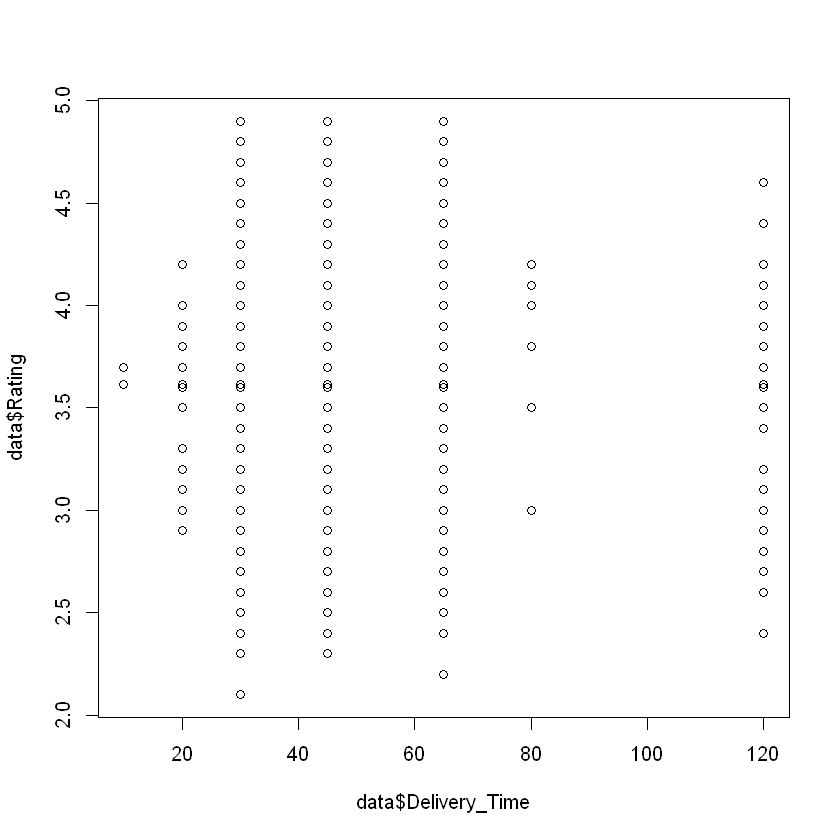

In [157]:
plot(data$Delivery_Time,data$Rating)

Findings: Orders delivered between 30 minutes and 70 minutes received a wide range of ratings. As a result, in this time slot delivery time is not the deciding factor for determining ratings.
Orders delivered between first 20 minutes received ratings in the range of 3.5-4.0. Thus, quick delivery time does receive a relatively good remarks from customers.
Orders delivered in 80 minutes got ratings in the range 3 to 4.5. This shows can there can few instances where in people are patient enough to 
vote for the orders and give good ratings but not excellent at all.
Orders delivered in 120 minutes also received a wide range of responses. However unlike 30-70 minutes slot, they did not receive full ratings.

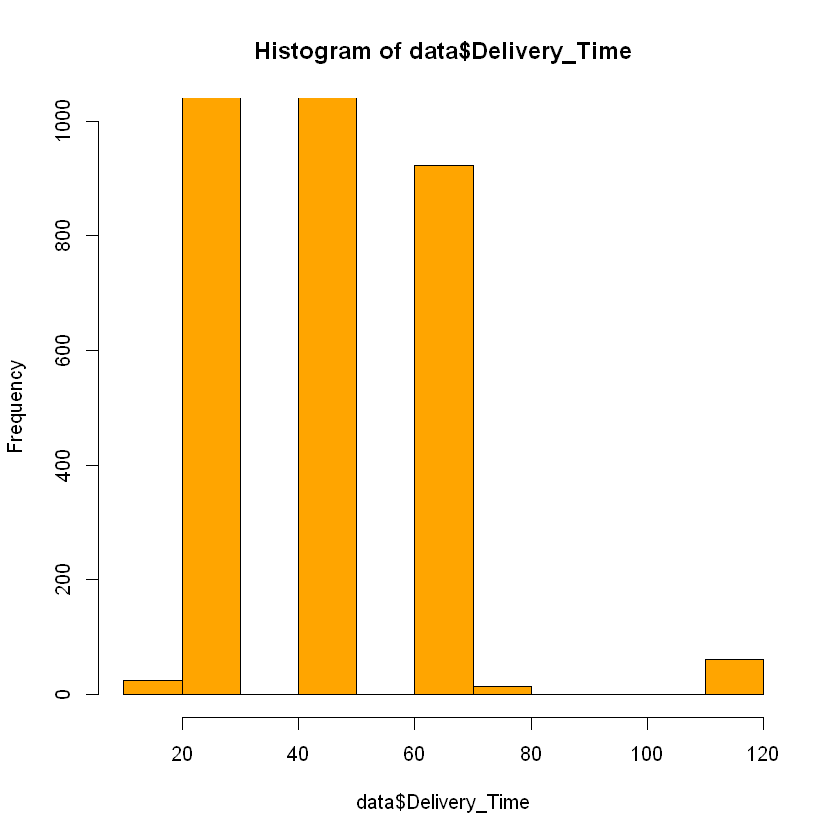

In [158]:
hist(data$Delivery_Time, col="orange", ylim=c(0,1000))

Findings: Most of the orders were delivered in the range 20-30 minutes and 40-50 minutes.
The next most popular time slot was 60 minutes to 70 minutes.
Delivery time of less than 20 minutes and 70-80 minutes was least frequent.
Some of the orders were also delivered in the time frame 110-120 minutes.

#### 3. Preprocessing

In [145]:
data$Votes = ifelse(is.na(data$Votes),
                     ave(data$Votes, FUN = function(x) mean(x, na.rm = TRUE)),
                     data$Votes)

In [146]:
data$Reviews = ifelse(is.na(data$Reviews),
                     ave(data$Reviews, FUN = function(x) mean(x, na.rm = TRUE)),
                     data$Reviews)

In [147]:
data$Rating = ifelse(is.na(data$Rating),
                     ave(data$Rating, FUN = function(x) mean(x, na.rm = TRUE)),
                     data$Rating)

Votes, Reviews and Rating have missing values which can affect the quality of analysis and hence handling it is necessary.
So, we have replaced the null/missing values in a particular field with the mean of the values belonging to that field.

In [148]:
data = subset(data, select = -c(Restaurant,Location,Cuisines,Average_Cost) )

We are only concerned with integer values for further analysis.
Thus, we have eliminated rows Restaurant, Location, Cuisines and Average_Cost for the time being.
Some of the records for the remaining fields have been displayed here.

In [149]:
head(data)

Minimum_Order,Rating,Votes,Reviews,Delivery_Time
50,3.5,12,4,30
50,3.5,11,4,30
50,3.6,99,30,65
99,3.7,176,95,30
99,3.2,521,235,65
50,3.8,46,18,30


In [150]:
summary(data)

 Minimum_Order        Rating          Votes           Reviews      
 Min.   :  0.00   Min.   :2.100   Min.   :   3.0   Min.   :   1.0  
 1st Qu.: 50.00   1st Qu.:3.400   1st Qu.:  26.0   1st Qu.:  11.0  
 Median : 50.00   Median :3.613   Median : 106.0   Median :  48.0  
 Mean   : 53.34   Mean   :3.613   Mean   : 244.5   Mean   : 123.2  
 3rd Qu.: 50.00   3rd Qu.:3.800   3rd Qu.: 244.5   3rd Qu.: 123.2  
 Max.   :500.00   Max.   :4.900   Max.   :9054.0   Max.   :6504.0  
 Delivery_Time   
 Min.   : 10.00  
 1st Qu.: 30.00  
 Median : 30.00  
 Mean   : 37.06  
 3rd Qu.: 45.00  
 Max.   :120.00  

Thus, we have eliminated all the missing values.
The measure of veracity of the analysis will increase because of this step.
Thus, the data has been successfully pre-processed and can be used as an input for EDA.
Minimum rating is 2.1 and maximum is 4.9. Average count of votes for rating purposes is 244.5. Maximum reviews on a restaurant is 6504 reviews.

#### 4. Model Training

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression.
The fundamental idea behind a random forest is to combine many decision trees into a single model. 
Individually, predictions made by decision trees (or humans) may not be accurate, but combined together, the predictions will be closer to the mark on average.

The set. seed() function sets the starting number used to generate a sequence of random numbers – it ensures that you get the same result if you start with that same seed each time you run the same process.
We then split the sample into training and test set. First 75 percent of the dataset goes for training and the remaining is used for testing.
 By centering values, the scale() function subtracts the values of every column by the corresponding 'center' value from the argument only if the value
provided is numeric. This is a part of feature scaling.
‘randomForest’ implements random forest algorithm for classification and regression. It can also be used in unsupervised mode for assessing proximities among data points.
The predict() function in R is used to predict the values based on the input data. We use test set here.
The rmse() function available in Metrics package in R is used to calculate root mean square error between actual values and predicted values. 
The RMSE value is quite less here.

In [151]:
set.seed(123)
split = sample.split(data$Delivery_Time, SplitRatio = 0.75)
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

In [153]:
#Feature Scaling
training = scale(training_set[-5])
test = scale(test_set[-5])

In [154]:
classifier_rf = randomForest(x = training,
                          y = training_set$Delivery_Time,
                          ntree = 500, random_state = 0)

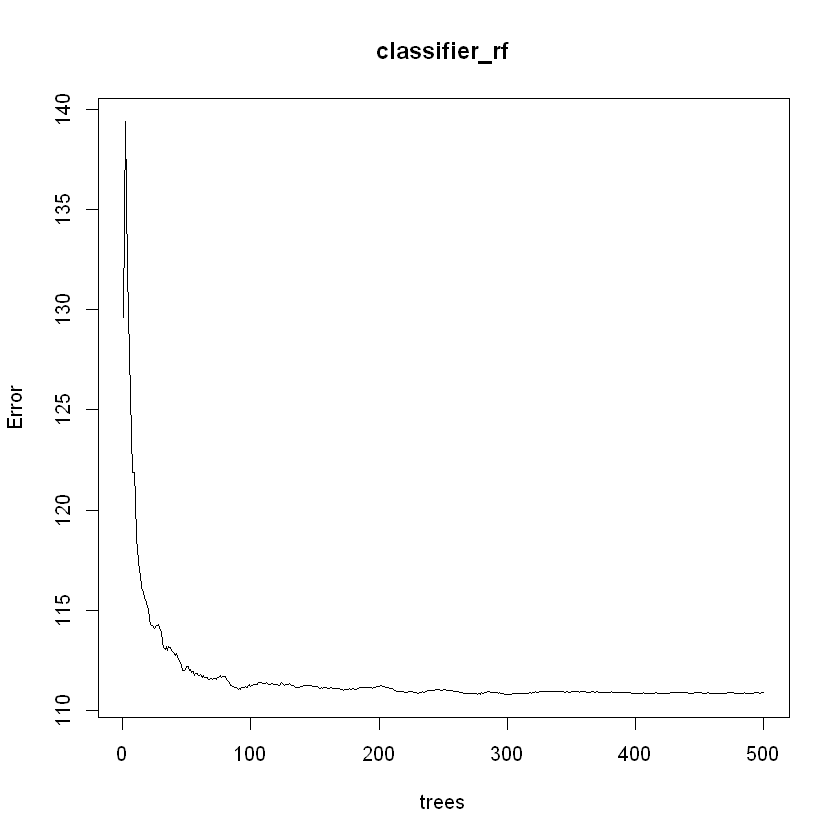

In [169]:
plot(classifier_rf)

This plot is for the classifier.
It maps the internal error metrics with respect to the number of decision trees.
As we start splitting the decision trees using random forest algorithm, the count of trees increases.
As this happens, it is observed that the error decreases.
This reinstates the whole ‘idea’ of using random forest technique.
Individually, predictions made by decision trees (or humans) may not be accurate, but combined together, the predictions will be closer to the mark on average.

In [155]:
pred_rf = predict(classifier_rf, newdata = test)

In [156]:
rmse(test_set$Delivery_Time, pred_rf)

[1] 11.57606

We handled missing values to increase quality of our analysis.
About the random forest algorithm- Aim is to combine many decision trees into a single model.
Combined predicted is more accurate than individual ones which is reinstated using low RMSE value (11.576).
Our prediction- For best results, the company should ensure that delivery should be done between 30 to 70 minutes to ensure optimum services are provided to the customer. 